In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
numerical_cols = [col for col in df.columns if df[col].dtype == "int"]
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]

numerical_cols , categorical_cols

(['age', 'children'], ['sex', 'smoker', 'region'])

In [7]:
dfn = pd.get_dummies(df, dtype=int)

In [8]:
dfn.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Creating X and y values (features and Labels)

In [9]:
X = dfn.drop("charges" , axis = 1)
y = dfn['charges'] 

In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Create Training and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [13]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [14]:
X_train , X_test , y_train , y_test

(<tf.Tensor: shape=(1070, 11), dtype=float64, numpy=
 array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
        [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
        [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]])>,
 <tf.Tensor: shape=(268, 11), dtype=float64, numpy=
 array([[45.   , 25.175,  2.   , ...,  0.   ,  0.   ,  0.   ],
        [36.   , 30.02 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
        [64.   , 26.885,  0.   , ...,  1.   ,  0.   ,  0.   ],
        ...,
        [38.   , 28.025,  1.   , ...,  0.   ,  0.   ,  0.   ],
        [54.   , 47.41 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        [51.   , 34.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ]])>,
 <tf.Tensor: shape=(1070,), dtype=float64, numpy=
 array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931

#### Creating the model 

In [15]:
tf.random.set_seed(42)

# Creating the Model 
model_1 = tf.keras.Sequential(name="Insurance_Model")
model_1.add(tf.keras.layers.Dense(10 , name = "Input_Layer"))
model_1.add(tf.keras.layers.Dense(1 , name = "Output_Layer"))

# Compiling the Model 

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

# Fitting the Model 

model_1.fit(X_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13222.7734 - mae: 13222.7734
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12937.4492 - mae: 12937.4492
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12366.9814 - mae: 12366.9814
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11398.3262 - mae: 11398.3262
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10106.5049 - mae: 10106.5049
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8821.8506 - mae: 8821.8506 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7865.1274 - mae: 7865.1274
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7468.8491 - mae: 7468.8491
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7389.0015 - mae: 7389.0015
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7356.8364 - mae: 7356.8364
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7333.3120 - mae: 7333.3120
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [16]:
model_1.evaluate(X_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5335.6689 - mae: 5335.6689  


[5172.212890625, 5172.212890625]

##### We can see the model is not performing that well so we can try to  improve the model more !

#### Model_2

In [17]:
tf.random.set_seed(42)

# Creating the model 
model_2 = tf.keras.Sequential(name = "Insurance_Model_2")
model_2.add(tf.keras.layers.Dense(100 , name = "Input_Layer"))
model_2.add(tf.keras.layers.Dense(1 , name = "Output_Layer"))

# Compile the model 

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss=tf.keras.losses.mae
)

# Fitting the model 
model_2.fit(X_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13131.0869 - mae: 13131.0869  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11364.0107 - mae: 11364.0107
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7980.2788 - mae: 7980.2788
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7397.0928 - mae: 7397.0928
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7318.0879 - mae: 7318.0879
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7242.1348 - mae: 7242.1348
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7161.9097 - mae: 7161.9097
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7079.5054 - mae: 7079.5054
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6987.6865 - mae: 6987.6865
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6891.6450 - mae: 6891.6450
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6783.9292 - mae: 6783.9292
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [18]:
model_2.evaluate(X_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3471.0454 - mae: 3471.0454  


[3400.05029296875, 3400.05029296875]

#### Model_3 

In [19]:
tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential(name = "Insurance_Model_3")
model_3.add(tf.keras.layers.Dense(100 , name = "Input_Layer"))
model_3.add(tf.keras.layers.Dense(1 , name = "Output_Layer"))

# Compile the model 

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss=tf.keras.losses.mae
)

# Fitting the model 
model_3.fit(X_train , y_train , epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13122.8682 - mae: 13122.8682  
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11275.2227 - mae: 11275.2227
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7923.2539 - mae: 7923.2539
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7390.3364 - mae: 7390.3364
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7312.7568 - mae: 7312.7568
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7236.7588 - mae: 7236.7588
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7158.1279 - mae: 7158.1279
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7074.3110 - mae: 7074.3110
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6984.3301 - mae: 6984.3301
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6890.1479 - mae: 6890.1479
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6781.7500 - mae: 6781.7500
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [20]:
model_3.evaluate(X_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3220.5076 - mae: 3220.5076


[3171.82568359375, 3171.82568359375]

In [23]:
tf.random.set_seed(42)

# Creating the model 
model_4 = tf.keras.Sequential(name = "Insurance_Model_4")
model_4.add(tf.keras.layers.Dense(100 , name = "Input_Layer"))
model_4.add(tf.keras.layers.Dense(10 , name = "Hidden_Layer"))
model_4.add(tf.keras.layers.Dense(1 , name = "Output_Layer"))

# Compile the model 

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss=tf.keras.losses.mae
)

# Fitting the model 
history = model_4.fit(X_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12608.6787 - mae: 12608.6787
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7544.1025 - mae: 7544.1025
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7235.9580 - mae: 7235.9580
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7018.7812 - mae: 7018.7812
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6729.8101 - mae: 6729.8101
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6383.7612 - mae: 6383.7612
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6228.3901 - mae: 6228.3901
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6091.6328 - mae: 6091.6328
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5933.9854 - mae: 5933.9854
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5734.0498 - mae: 5734.0498
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5427.4414 - mae: 5427.4414
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [25]:
model_4.evaluate(X_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3238.2488 - mae: 3238.2488  


[3174.593994140625, 3174.593994140625]

Text(0.5, 0, 'epochs')

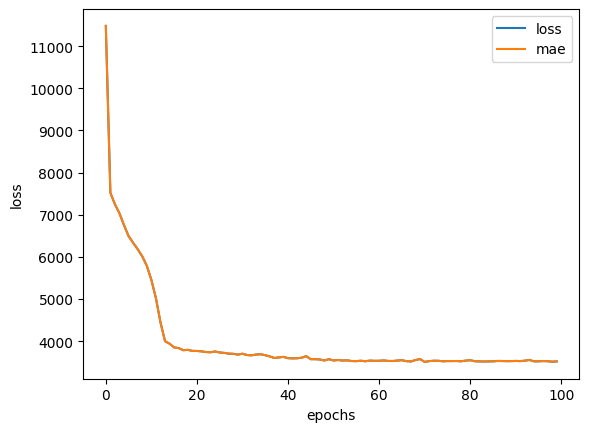

In [24]:
pd.DataFrame(history.history).plot() 
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. 

**NOTE** : 
- We can notice our model is not improving , so we should consider doing some preprocessing 

### Preprocessing the Dataset

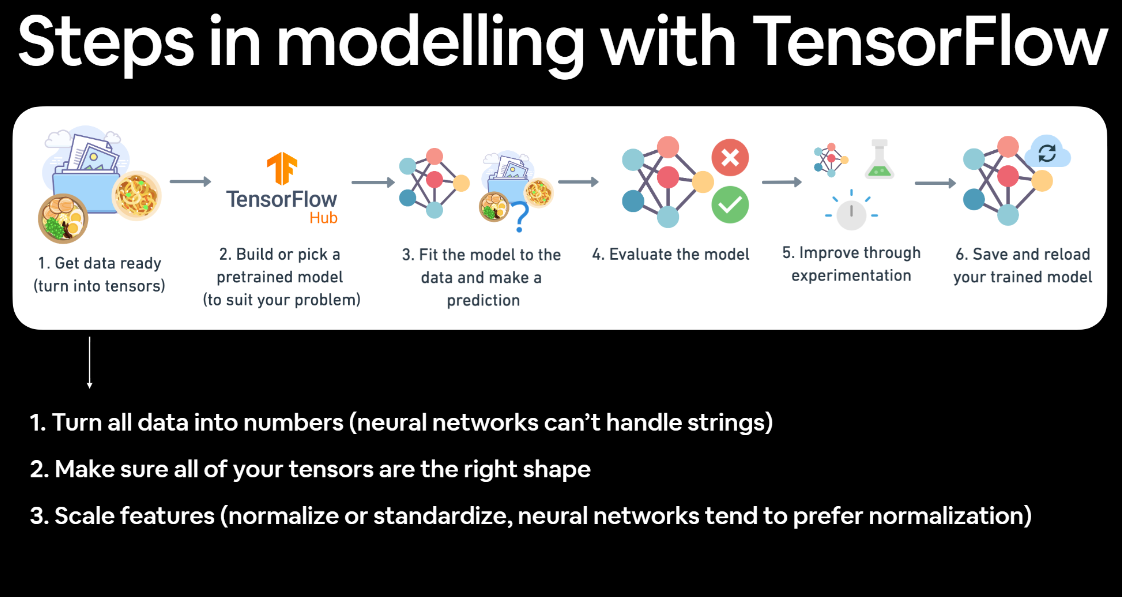

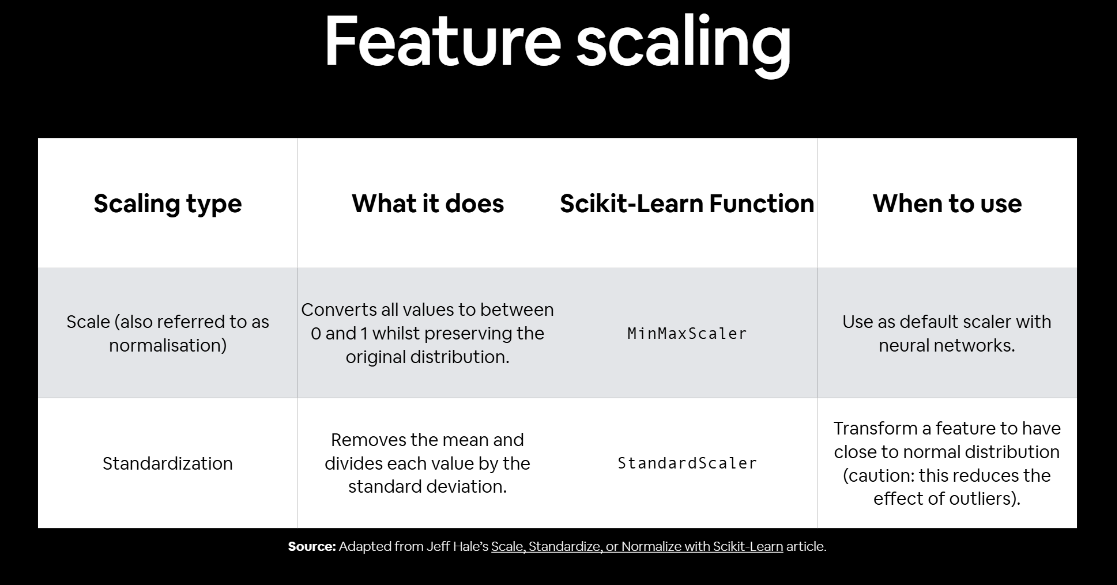

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).

**Feature scaling:**
- Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
- Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
  
**Which one should you use?**

- With neural networks you'll tend **to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

Scikit-Learn's documentation on preprocessing data.
Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder 
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import train_test_split

In [29]:
# Create a Column transformer 
ct = make_column_transformer(
    (MinMaxScaler() , ["age" , "bmi" , "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker" , "region"])
)

In [32]:
# Create X and y 
insurance  = pd.read_csv("insurance.csv")
X = insurance.drop("charges" , axis=1)
y = insurance["charges"]

In [33]:
# creating Train and Test data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [34]:
# Fitting our column transformer to our training data 
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [35]:
# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [40]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [42]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [43]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

#### Build Our Model On Normalized Data 

In [45]:
tf.random.set_seed(42)

# Creating the model 
insurance_model = tf.keras.Sequential(name = "Insurance_Model")
insurance_model.add(tf.keras.layers.Dense(100 , name = "Input_Layer"))
insurance_model.add(tf.keras.layers.Dense(10 , name = "Hidden_Layer"))
insurance_model.add(tf.keras.layers.Dense(1 , name = "Output_Layer"))

# Compile the model 

insurance_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    loss=tf.keras.losses.mae
)

# Fitting the model 
history = insurance_model.fit(X_train_normal , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13260.0283 - mae: 13260.0283
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12187.9580 - mae: 12187.9580
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8503.1680 - mae: 8503.1680
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7633.5645 - mae: 7633.5645
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7188.0908 - mae: 7188.0908
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6621.7681 - mae: 6621.7681
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5802.5259 - mae: 5802.5259
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4633.0835 - mae: 4633.0835
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3755.0896 - mae: 3755.0896
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3636.6404 - mae: 3636.6404
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3625.1824 - mae: 3625.1824
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [46]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3220.0505 - mae: 3220.0505  


[3165.893310546875, 3165.893310546875]

Text(0.5, 0, 'epochs')

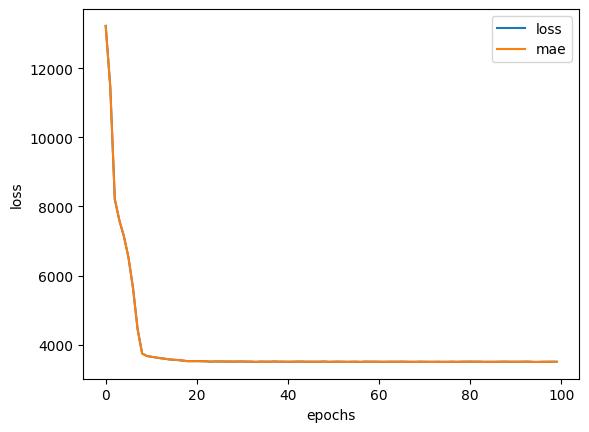

In [47]:
pd.DataFrame(history.history).plot() 
plt.ylabel("loss")
plt.xlabel("epochs")